# Project Overview: Machine Learning

In this Jupyter notebook, we explore the application of machine learning to the domain of trading, aiming to predict buy and sell signals. Machine learning (ML) is a subset of artificial intelligence (AI) that involves training algorithms on historical data to make predictions or decisions without being explicitly programmed for each specific task. In trading, ML can help identify patterns and make data-driven decisions to enhance trading strategies.

## Machine Learning Models
We will employ three machine learning models to predict trading signals: Logistic Regression, Support Vector Machine (SVM), and XGBoost. Each of these models has unique characteristics and strengths that make them suitable for different aspects of predictive modeling in trading.

### Logistic Regression
Logistic Regression is a statistical model that is commonly used for binary classification tasks. It models the probability that a given input belongs to a particular class. Despite its simplicity, Logistic Regression is powerful for problems where the relationship between the input features and the output can be approximated by a linear decision boundary. In the context of trading, Logistic Regression can help determine the likelihood of a price movement being upward or downward, thus indicating buy or sell signals.

### Support Vector Machine (SVM)
Support Vector Machine is a robust and versatile classification algorithm that aims to find the optimal hyperplane that best separates different classes in the feature space. SVM is particularly effective in high-dimensional spaces and when the classes are not linearly separable, thanks to its ability to use kernel functions. In trading, SVM can be used to classify market conditions or price movements, providing clear signals for buying or selling based on the patterns it learns from historical data.

### XGBoost
XGBoost (Extreme Gradient Boosting) is an advanced implementation of gradient boosting algorithms designed for speed and performance. It builds an ensemble of weak prediction models, typically decision trees, to create a strong overall model. XGBoost is known for its efficiency and accuracy, making it a popular choice for many machine learning competitions. In trading, XGBoost can capture complex patterns and interactions in the data, leading to highly accurate predictions for buy and sell signals.

## Objective
The primary goal of this notebook is to compare these three models—Logistic Regression, SVM, and XGBoost—to determine which one performs best in predicting buy and sell signals for trading. We will evaluate their performance based on various metrics and ultimately identify the model that provides the most reliable predictions.

### Apple with 1 minute interval

### Apple with 5 minutes intervals

In [14]:
from M_L import Operation, TradingStrategy
strategy = TradingStrategy('A5')
strategy.optimize_and_fit_models()
strategy.run_combinations()

[I 2024-06-14 16:10:18,214] A new study created in memory with name: no-name-8fda680c-fb09-4d75-ac3a-348e2e2df0b2
[I 2024-06-14 16:10:53,085] Trial 0 finished with value: 0.6637833772094772 and parameters: {'C': 5804.936842341739, 'l1_ratio': 0.2525908758838841, 'fit_intercept': True}. Best is trial 0 with value: 0.6637833772094772.
[I 2024-06-14 16:11:27,774] Trial 1 finished with value: 0.6643501126972201 and parameters: {'C': 2.3164464870162456, 'l1_ratio': 0.9678652625320008, 'fit_intercept': True}. Best is trial 1 with value: 0.6643501126972201.
[I 2024-06-14 16:12:02,603] Trial 2 finished with value: 0.6651668541432321 and parameters: {'C': 31585.783239670014, 'l1_ratio': 0.729802085568637, 'fit_intercept': False}. Best is trial 2 with value: 0.6651668541432321.
[I 2024-06-14 16:12:02,690] Trial 3 finished with value: 0.6982228585867094 and parameters: {'C': 5.684711305025083e-06, 'l1_ratio': 0.7451558178163119, 'fit_intercept': True}. Best is trial 3 with value: 0.69822285858670

Using: ['Logistic'] for ML
Using: ['XGBoost'] for ML
Using: ['SVM'] for ML
Using: ['Logistic', 'XGBoost', 'SVM'] for ML
The best one was: ['SVM'] with a value of: 873774.577192518


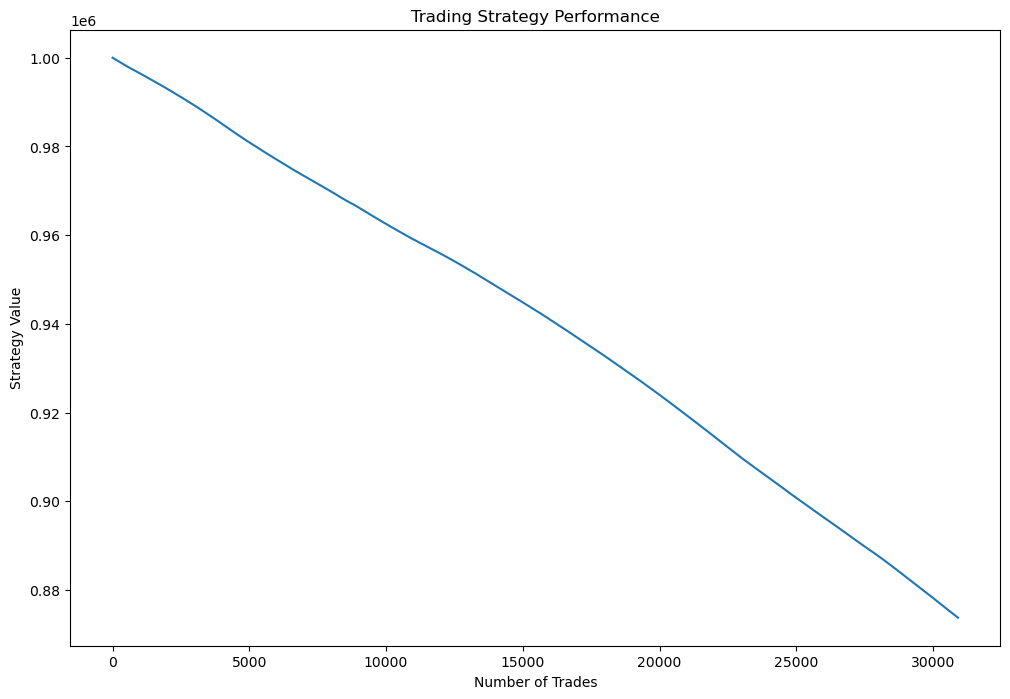

In [15]:
strategy.plot_results(best = True)

In [16]:
strategy.optimize_trade_parameters()

[I 2024-06-14 16:50:05,747] A new study created in memory with name: no-name-75fae4a2-762e-4647-822d-5760a4c4d80e
[I 2024-06-14 16:50:13,834] Trial 0 finished with value: 810661.8657887966 and parameters: {'stop_loss_pct': 0.9320162049991413, 'take_profit_pct': 1.083237469956724, 'n_shares': 15}. Best is trial 0 with value: 810661.8657887966.
[I 2024-06-14 16:50:21,995] Trial 1 finished with value: 318382.71683965164 and parameters: {'stop_loss_pct': 0.914317301421523, 'take_profit_pct': 1.069555996556711, 'n_shares': 54}. Best is trial 0 with value: 810661.8657887966.
[I 2024-06-14 16:50:29,960] Trial 2 finished with value: 835906.9503502961 and parameters: {'stop_loss_pct': 0.9560306365932731, 'take_profit_pct': 1.0613222536175397, 'n_shares': 13}. Best is trial 2 with value: 835906.9503502961.
[I 2024-06-14 16:50:38,130] Trial 3 finished with value: 154289.6671899353 and parameters: {'stop_loss_pct': 0.9311435552346864, 'take_profit_pct': 1.0596109469010946, 'n_shares': 67}. Best is

Mejores parámetros encontrados: {'stop_loss_pct': 0.9174958365728603, 'take_profit_pct': 1.0385815075896079, 'n_shares': 1}


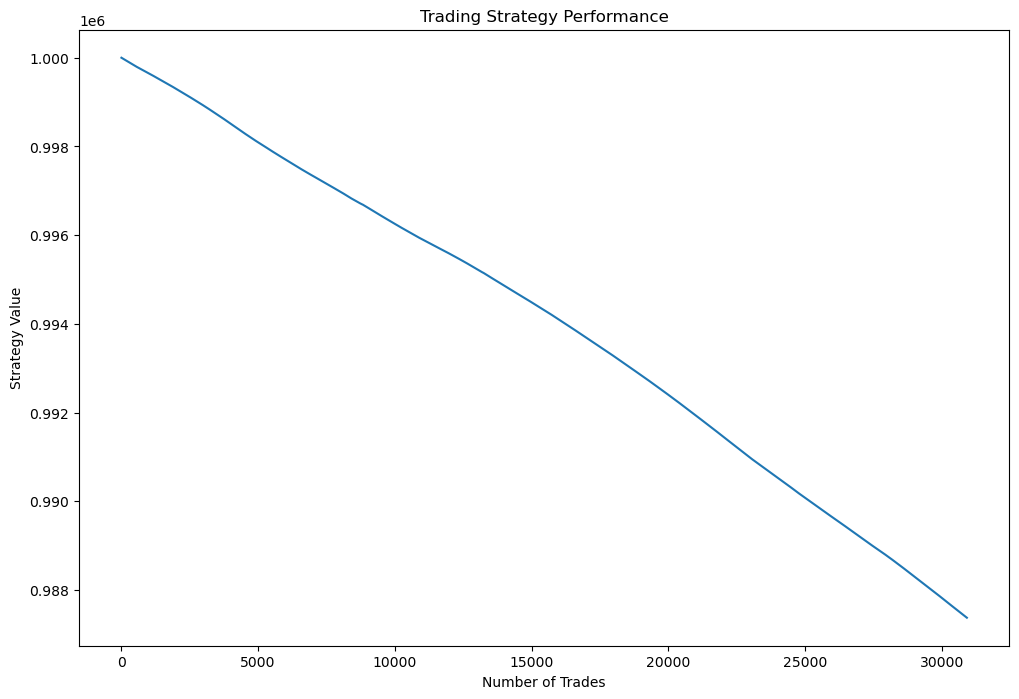

In [17]:
strategy.plot_results(best = True)

The passive asset return is: 2.41%
The trading strategy return is: -1.26%


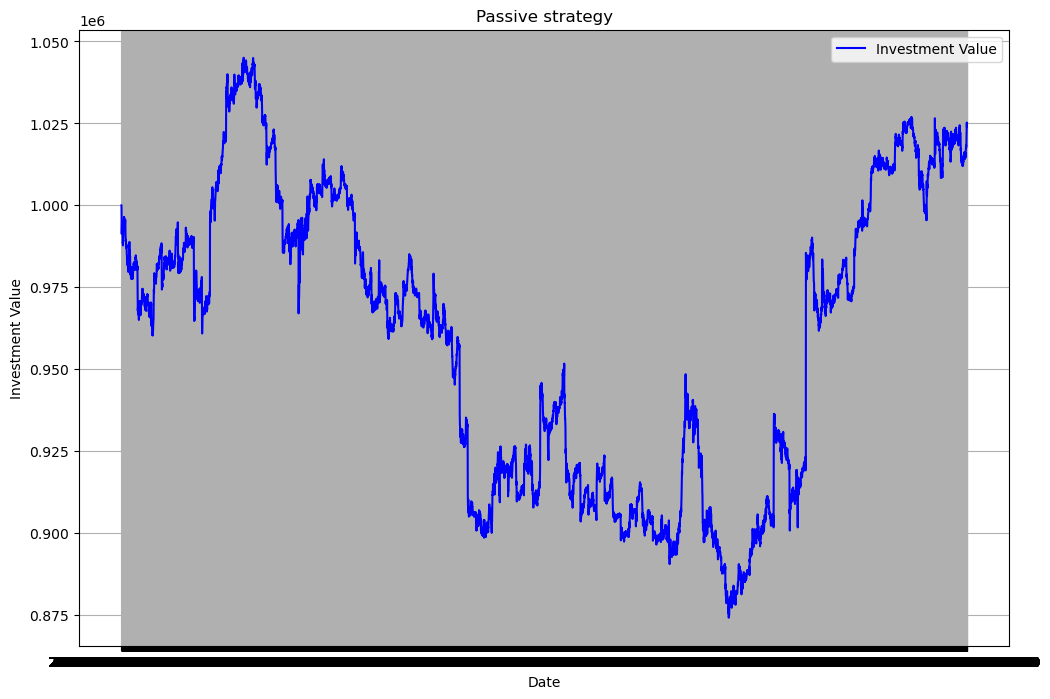

The final value of the investment: $1,024,077.16


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data/aapl_project_test.csv')
# Get first and last close data
primer_cierre = data.iloc[0]['Close']
ultimo_cierre = data.iloc[-1]['Close']

# Get asset yeild
rend_pasivo = (ultimo_cierre - primer_cierre) / primer_cierre
print("The passive asset return is: {:.2%}".format(rend_pasivo))

# Compare with used strategy
cash = 1000000
cashfinal = 987377.4577192613 # Change this
rend_estrategia = (cashfinal - cash) / cash
print("The trading strategy return is: {:.2%}".format(rend_estrategia))

# Sort data
data = data.sort_values(by='Datetime')

# Rend
data['Returns'] = data['Close'].pct_change().fillna(0)

# See the value passive
initial_investment = cash
data['Investment_Value'] = (1 + data['Returns']).cumprod() * initial_investment

# Graficar el rendimiento de la inversión
plt.figure(figsize=(12, 8))
plt.plot(data['Datetime'], data['Investment_Value'], label='Investment Value', color='blue')
plt.title('Passive strategy')
plt.xlabel('Date')
plt.ylabel('Investment Value')
plt.legend()
plt.grid(True)
plt.show()

valor_final = data['Investment_Value'].iloc[-1]
print("The final value of the investment: ${:,.2f}".format(valor_final))